In [138]:
import pandas as pd

### Q1. Charger les données dans deux DataFrames pandas

In [245]:
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

In [179]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


### Q2. Calculer le revenu total de l'industrie du cinéma

In [180]:
movies["revenue"].sum()

395097847444

Le revenu total était de 395 097 847 444$.

### Q3.1. Créer une colonne `release_year` contenant l'année de sortie du film

Il y a plusieurs manières qui fonctionnent pour créer cette colonne. Je vais en donner plusieurs ci-dessous.

La première consiste à convertir la colonne `release_date` qui est une str en objet Python datetime pour ensuite en extraire l'année avec des fonctions d'extraction Python. Il y a deux variantes pour cette solution.

La seconde consiste à récupérer seulement dans la string les caractères qui composent l'année, c'est-à-dire les 4 premiers caractères. Il y a aussi plusieurs variantes pour cette solution.

#### Version 1.

In [181]:
movies["release_year"] = pd.to_datetime(movies["release_date"]).dt.year

In [182]:
movies["release_year"].head()

0    2009.0
1    2007.0
2    2015.0
3    2012.0
4    2012.0
Name: release_year, dtype: float64

#### Version 2.

Le isinstance est ajouté car il y a une ligne qui ne contient pas une date à l'intérieur (voir la dernière cellule de cette version).

In [183]:
movies["release_year"] = movies["release_date"].apply(lambda d: isinstance(d, str) and d[:4])

In [184]:
movies["release_year"].head()

0    2009
1    2007
2    2015
3    2012
4    2012
Name: release_year, dtype: object

Je décide de supprimer cette ligne qui ne contient que trop peu d'information.

In [185]:
movies = movies[movies["release_year"].str.len() == 4]

In [283]:
movies.shape

(4803, 21)

### Q3.2. Créer une colonne `profit` avec le profit de chaque film

In [186]:
movies["profit"] = movies["revenue"] - movies["budget"]

/Users/christophe.blefari/.virtualenvs/lab/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Q3.3. Créer le graphique affichant le profit année par année

In [187]:
%matplotlib inline

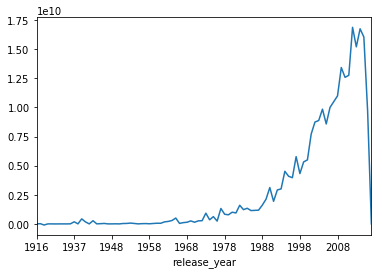

In [188]:
movies.groupby("release_year")["profit"].sum().plot(kind="line")

### Q4. Quel est le film qui a été le plus profitable ?

Pour trouver le film le plus profitable il suffit de trier la colonne de profit dans l'ordre décroissant.

In [189]:
movies.sort_values("profit", ascending=False).loc[0, "original_title"]

'Avatar'

### Q5. Quel est le mot le plus présent dans la description des films ?

On va utiliser la colonne `overview` pour rechercher le mot le plus présent dans la description des films. Pour cela on va séparer toutes les descriptions par `espace` et on va aussi remplacer tous les caractères spéciaux par rien. 

Pour les caractères spéciaux nous allons utiliser une expression régulière pour sélectionner les caractères spéciaux et les remplacer.

In [190]:
descriptions = movies["overview"].str.replace(r",|\(|\)|\[|\]|;|\/|\\|\"|\.|\'", "").str.lower().str.split(" ")

In [191]:
descriptions_clean = descriptions[descriptions.notnull()]

In [192]:
descriptions_clean.head()

0    [in, the, 22nd, century, a, paraplegic, marine...
1    [captain, barbossa, long, believed, to, be, de...
2    [a, cryptic, message, from, bond’s, past, send...
3    [following, the, death, of, district, attorney...
4    [john, carter, is, a, war-weary, former, milit...
Name: overview, dtype: object

In [193]:
from collections import Counter

In [194]:
all_words = descriptions_clean.sum()
total = Counter(all_words)
total.most_common(10)

[('the', 13892),
 ('a', 10445),
 ('to', 7921),
 ('and', 7385),
 ('of', 6863),
 ('in', 4534),
 ('his', 3990),
 ('is', 3367),
 ('with', 2532),
 ('her', 2158)]

Pour plus de pertinence on va aussi enlever tous les stopwords anglais des descriptions. 

In [195]:
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [196]:
for word in stopwords:
    del total[word]

In [197]:
total.most_common(10)

[('life', 792),
 ('new', 714),
 ('one', 682),
 ('young', 629),
 ('world', 555),
 ('two', 538),
 ('man', 500),
 ('family', 487),
 ('find', 471),
 ('story', 445)]

In [198]:
total.most_common(1)[0][1] / len(movies)

0.16493127863390253

Le mot life apparait dans 16% des descriptions.

### Q6. Afficher le diagramme en camembert des langues de sorties des films

Pour cette question nous allons devoir travailler avec la colonne `original_language`. Un groupby classique permet de compter facilement le nombre de fois où apparrait chaque langue. On peut aussi faire un `value_counts`.

In [199]:
movies["original_language"].value_counts().head(5)

en    4504
fr      70
es      32
de      27
zh      27
Name: original_language, dtype: int64

Pour afficher en camembert c'est maintenant très simple.

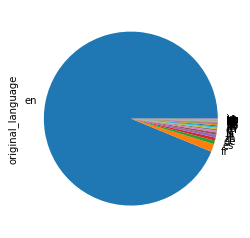

In [200]:
movies["original_language"].value_counts().plot(kind='pie')

Le soucis c'est que l'anglais cache tout, on peut donc se permettre de supprimer l'anglais dans un second camembert pour y voir plus clair.

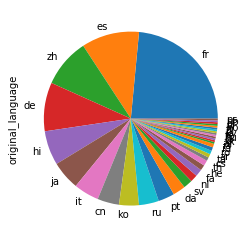

In [201]:
movies[movies["original_language"] != "en"]["original_language"].value_counts().plot(kind="pie")

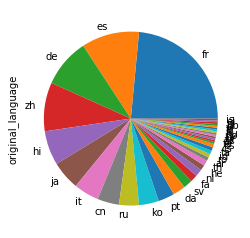

In [202]:
# Une autre manière de le faire serait la suivante :
counts = movies["original_language"].value_counts()
counts[1:].plot(kind="pie")

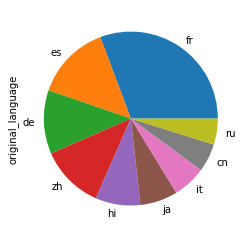

In [203]:
# Si l'on veut seulement les 10 premiers sans l'anglais
counts[1:10].plot(kind="pie")

### Q7. Quels sont les pays qui ont produit le plus de films ?

Cette question demande un peu de recherche et d'immagination. Mais elle n'est pas impossible. Nous allons devoir travailler avec la colonne `production_countries`. Cette colonne contient une structure JSON qui a été sérialisée en string. Dans cette structure nous avons une liste de dictionnaires de pays. Les pays sont identifiés avec leur code ISO et leur nom en anglais.

Pour pouvoir trouver les pays qui ont produit le plus de films nous allons devoir parser et nettoyer cette colonne dans un format qui nous permettra ensuite de faire un groupby comme nous avons déjà fait précédemment. Il semblerait aussi qu'un film peut être produit par plusieurs pays.

Pour commencer regardons ce qu'il y a dans la première ligne pour cette colonne.

In [204]:
movies.loc[0, "production_countries"]

'[{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]'

Cela signifie que le film a été produit par les États-Unis et la Grande Bretagne.

Nous pouvons utiliser cet exemple pour comprendre comment parser la structure JSON.

In [205]:
import json

json.loads(movies.loc[0, "production_countries"])

[{'iso_3166_1': 'US', 'name': 'United States of America'},
 {'iso_3166_1': 'GB', 'name': 'United Kingdom'}]

In [206]:
# Avec une compréhension de liste nous pouvons récupérer la liste des ISO.
[country["iso_3166_1"] for country in json.loads(movies.loc[0, "production_countries"])]

['US', 'GB']

Maintenant que nous savons comment lire les données nous allons appliquer cette opération à toute la colonne.

En premier lieu nous allons convertir toute la colonne en JSON.

In [207]:
movies["production_countries_parsed"] = movies["production_countries"].apply(json.loads)

/Users/christophe.blefari/.virtualenvs/lab/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Nous allons vérifier s'il y a des valeurs nulles dans cette nouvelle colonne.

In [209]:
movies[movies["production_countries_parsed"].apply(len) == 0].shape

(173, 23)

Il y a en effet 173 valeurs nulles que nous allons supprimer pour cette question.

In [210]:
countries = movies[movies["production_countries_parsed"].apply(len) != 0]["production_countries_parsed"]

In [211]:
countries.head(2)

0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
Name: production_countries_parsed, dtype: object

Nous allons utiliser json_normalize qui permet de créer une dataframe à partir d'une série JSON.

In [213]:
from pandas.io.json import json_normalize

In [229]:
json_normalize(countries.sum()).head()

,iso_3166_1,name
0,US,United States of America
1,GB,United Kingdom
2,US,United States of America
3,GB,United Kingdom
4,US,United States of America


In [232]:
json_normalize(countries.sum())["iso_3166_1"].value_counts().head(10)

US    3956
GB     636
DE     324
FR     306
CA     261
AU     110
IT      72
ES      71
CN      59
JP      58
Name: iso_3166_1, dtype: int64

Ci-dessous avec le `value_counts` nous pouvons faire le groupby. On trouve donc que les États-Unis sont le pays qui produit le plus de film.

### Q8. Quel est le genre le plus présent au cinéma

On va répéter l'opération précédente mais avec l'autre colonne.

In [273]:
json_normalize(movies["genres"].apply(json.loads).sum())["name"].value_counts().head(1)

Drama    2297
Name: name, dtype: int64

### Q9. Donner la note moyenne par genre

On va s'inspirer de la question précédente pour ajouter la note dans chaque objet de genre et ensuite on va pondérer les moyennes et faire le groupby. 

In [246]:
movies["genres_parsed"] = movies["genres"].apply(json.loads)

In [254]:
genres_with_vote = movies[["genres_parsed", "vote_average", "vote_count"]].apply(
    lambda row: [{
        "vote_average": row["vote_average"],
        "vote_count": row["vote_count"],
        "name": genre["name"],
    } for genre in row["genres_parsed"]], 
    axis=1,
)

In [278]:
votes = json_normalize(genres_with_vote.sum())

In [280]:
votes["avg_x_count"] = votes["vote_average"] * votes["vote_count"]

In [281]:
votes.groupby("name")["avg_x_count"].sum() / votes.groupby("name")["vote_count"].sum()

name
Action             6.643429
Adventure          6.727463
Animation          6.936330
Comedy             6.503382
Crime              6.909562
Documentary        6.955274
Drama              7.074271
Family             6.780504
Fantasy            6.635589
Foreign            6.463388
History            7.199755
Horror             6.289822
Music              6.742711
Mystery            6.860035
Romance            6.710287
Science Fiction    6.725545
TV Movie           5.557867
Thriller           6.689082
War                7.236123
Western            7.130778
dtype: float64

### Q10. Dans combien de film a joué Brad Pitt ?

Nous allons utiliser l'autre DataFrame `credits`. Il y a une astuce assez simple pour résoudre ce soucis, il suffit de faire une recherche dans la string de cast pour voir si Brad Pitt est dedans.

In [260]:
# Regardons rapidement le contenu de la colonne
credits.loc[0, "cast"]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [262]:
brad_pitt_movies = credits[credits["cast"].str.contains("Brad Pitt")]

In [263]:
len(brad_pitt_movies)

38

Donc Brad Pitt a joué dans 38 films.

### Q11. Quel était le premier film d'Angelina Jolie

Nous pouvons utiliser la même astuce que précédemment et trier les films dans l'ordre de sortie. Pour avoir la date de sortie nous allons devoir faire une jointure avec la DataFrame `movies`.

In [268]:
credits_with_year = credits.merge(movies[["id", "release_date"]], left_on="movie_id", right_on="id")

In [271]:
credits_with_year[credits_with_year["cast"].str.contains("Angelina Jolie")].sort_values("release_date").head(4)

,movie_id,title,cast,crew,id,release_date
1281,10428,Hackers,"[{""cast_id"": 16, ""character"": ""Dade Murphy / '...","[{""credit_id"": ""52fe436e9251416c750100bb"", ""de...",10428,1995-09-14
1489,12596,Pushing Tin,"[{""cast_id"": 1, ""character"": ""Nick Falzone"", ""...","[{""credit_id"": ""52fe45039251416c75048bc1"", ""de...",12596,1999-04-23
1009,9481,The Bone Collector,"[{""cast_id"": 1, ""character"": ""Lincoln Rhyme"", ...","[{""credit_id"": ""52fe44fdc3a36847f80b61e7"", ""de...",9481,1999-11-04
1974,3558,"Girl, Interrupted","[{""cast_id"": 14, ""character"": ""Susanna Kaysen""...","[{""credit_id"": ""52fe439cc3a36847f806189f"", ""de...",3558,1999-12-21


Angelina Jolie a joué dans `Hackers` et considérant cette liste de film, ça a été son premier.

Fin du projet.